In [1]:
# Data manipulation and visualization
import pandas as pd
import seaborn as sns

# Excel file manipulation
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import get_column_letter
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.styles import PatternFill

In [2]:
# Read in the data 
contestants = pd.read_excel('data/contestants.xlsx')

In [3]:
contestants.head()

,EMAIL,PRE,POST,SEX,EDUCATION,STUDY_HOURS
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2


In [4]:
# Convert headers to all lowercase
contestants.columns = contestants.columns.str.lower()
contestants.head()

,email,pre,post,sex,education,study_hours
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2


In [5]:
# Define a regular expression pattern for valid email addresses
email_pattern = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'  

In [6]:
full_emails = contestants[contestants['email'].str.contains(email_pattern)]

In [7]:
# Dimensions of original DataFrame
contestants.shape

(100, 6)

In [8]:
# Dimensions of DataFrame with valid emails
full_emails.shape

(82, 6)

In [9]:
full_emails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   email        82 non-null     object 
 1   pre          82 non-null     int64  
 2   post         82 non-null     int64  
 3   sex          82 non-null     object 
 4   education    81 non-null     object 
 5   study_hours  82 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ KB


In [10]:
full_emails.isnull().mean().sort_values(ascending=False)

education      0.012195
email          0.000000
pre            0.000000
post           0.000000
sex            0.000000
study_hours    0.000000
dtype: float64

In [11]:
complete_cases = full_emails.dropna()

In [12]:
complete_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   email        81 non-null     object 
 1   pre          81 non-null     int64  
 2   post         81 non-null     int64  
 3   sex          81 non-null     object 
 4   education    81 non-null     object 
 5   study_hours  81 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ KB


In [13]:
complete_cases['post_pct'] = complete_cases['post'].rank(pct=True)
complete_cases['post_pct'].describe()

C:\Users\georg\AppData\Local\Temp\ipykernel_2400\2866818265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_cases['post_pct'] = complete_cases['post'].rank(pct=True)


count    81.000000
mean      0.506173
std       0.290352
min       0.012346
25%       0.265432
50%       0.506173
75%       0.759259
max       1.000000
Name: post_pct, dtype: float64

In [14]:
complete_cases.describe()

,pre,post,study_hours,post_pct
count,81.000000,81.000000,81.000000,81.000000
mean,480.506173,481.012346,23.445679,0.506173
std,20.626514,23.037737,8.178142,0.290352
min,409.000000,398.000000,0.000000,0.012346
25%,470.000000,467.000000,18.700000,0.265432
50%,484.000000,483.000000,22.600000,0.506173
75%,494.000000,497.000000,29.000000,0.759259
max,521.000000,540.000000,42.800000,1.000000


In [15]:
# Create a new workbook and select the worksheet
wb = Workbook()

# Assign the active worksheet to ws
ws = wb.active

In [16]:
ws['A1'] = "Average pre score"
# Round output to two decimals
ws['B1'] = round(complete_cases['pre'].mean(), 2)  

ws['A2'] = "Average post score"
ws['B2'] = round(complete_cases['post'].mean(), 2)

In [17]:
ws.column_dimensions['A'].width = 16

In [18]:
# Create a bar chart object
chart = BarChart()

# Define the data range
data = Reference(ws, min_col=2, min_row=1, max_col=2, max_row=2)

In [19]:
# Add data to the chart
chart.add_data(data)

# Set chart title, axis labels
chart.title = "Score Comparison"
chart.x_axis.title = "Score Type"
chart.y_axis.title = "Score Value"

In [20]:
# Set category names
categories = Reference(ws, min_col=1, min_row=1, max_row=2)
chart.set_categories(categories)

# Remove the legend
chart.legend = None

In [21]:
# Add the chart to a specific location on the worksheet
ws.add_chart(chart, "D1")

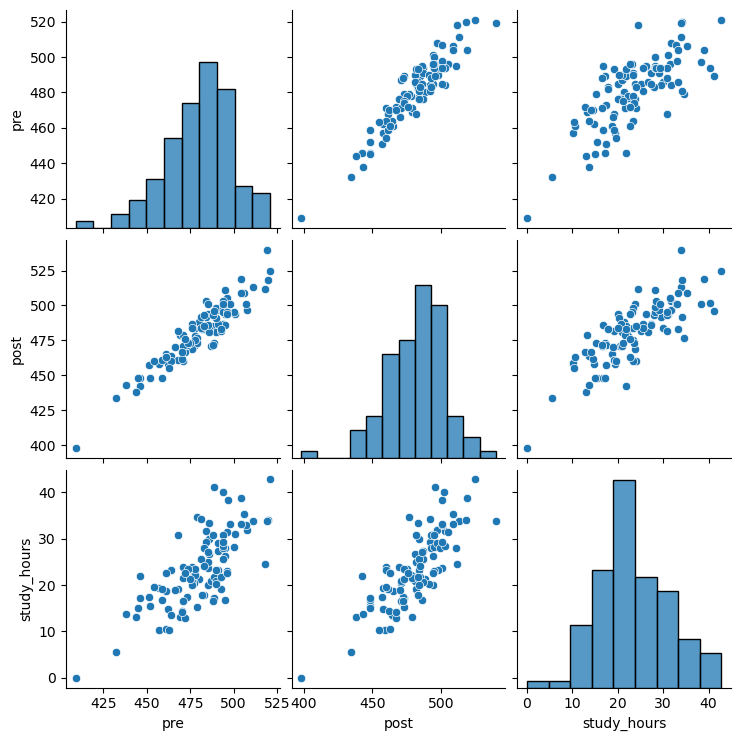

In [22]:
sns.pairplot(contestants[['pre', 'post', 'study_hours']])

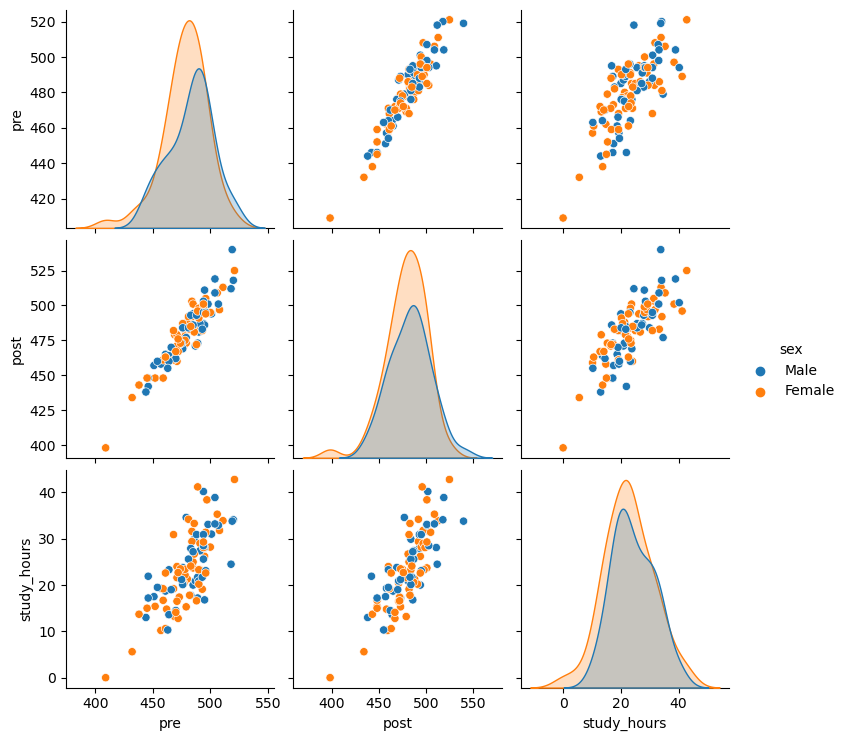

In [23]:
sns_plot = sns.pairplot(contestants[['pre', 'post', 'study_hours', 'sex']],
            hue='sex')

In [24]:
# Save pairplot to disk as an image
sns_plot.savefig('output/pairplot.png')

# Load saved image into the worksheet
image = Image('output/pairplot.png')
ws.add_image(image, 'A20')

In [25]:
ws2 = wb.create_sheet(title='data')

In [26]:
for row in dataframe_to_rows(complete_cases, index=False, header=True):
    ws2.append(row)

In [27]:
post_pct_loc = complete_cases.columns.get_loc('post_pct') + 1
post_pct_col = get_column_letter(post_pct_loc) 
post_pct_col

'G'

In [28]:
number_format = '0.0%'

for cell in ws2[post_pct_col]:
    cell.number_format = number_format

In [29]:
# Specify desired table formatting
style = TableStyleInfo(name='TableStyleMedium9', showRowStripes=True)

# Name and identify range of table
table = Table(displayName='contestants', 
              ref='A1:' + get_column_letter(ws2.max_column) + 
                  str(ws2.max_row))
              
# Apply styling and insert in worksheet 
table.tableStyleInfo = style
ws2.add_table(table)

In [30]:
# Define conditional formatting style
green_fill = PatternFill(start_color="B9E8A2", 
                         end_color="B9E8A2", fill_type="solid")
yellow_fill = PatternFill(start_color="FFF9D4", 
                          end_color="FFF9D4", fill_type="solid")

# Loop through data table and conditonally apply formatting
for row in ws2.iter_rows(min_row=2, min_col=1, 
                         max_col=len(complete_cases.columns)):
    # Convert index to 0-based indexing
    post_pct = row[post_pct_loc - 1].value 
    if post_pct > .9:
        for cell in row:
            cell.fill = green_fill
    elif post_pct > .7:
        for cell in row:
            cell.fill = yellow_fill

In [31]:
for column in ws2.columns:
    max_length = 0
    column_letter = column[0].column_letter
    for cell in column:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(cell.value)
        except:
            pass
    adjusted_width = (max_length + 2) * 1.2
    ws2.column_dimensions[column_letter].width = adjusted_width

In [32]:
wb.save('output/ch_12_output.xlsx')